In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [4]:
url = 'https://d18ky98rnyall9.cloudfront.net/_5e80885b18b2ac5410ea4eb493b68fb4_gapminder.csv?Expires=1582070400&Signature=RfBHKt-Ik-LyvJZuxTVj-IutL9m8HfSFMh26EnjtMABBLfEEtPsntCLUCbsBPyd-Irnn0N7GUStXxLktotlsqRuEsLwvv5DQPvH2F5thl1pAdObRWqhJVugN3Gnq9XxGNhZx4yUDJ-kELPsDSYkTgIvTqfar1a44f0dwb35v~yU_&Key-Pair-Id=APKAJLTNE6QMUY6HBC5A'
gapminder_data = pd.read_csv(url)
gapminder_data.to_csv('data/gapminder.csv', index=False)

In [5]:
gapminder_data.columns

Index(['country', 'incomeperperson', 'alcconsumption', 'armedforcesrate',
       'breastcancerper100th', 'co2emissions', 'femaleemployrate', 'hivrate',
       'internetuserate', 'lifeexpectancy', 'oilperperson', 'polityscore',
       'relectricperperson', 'suicideper100th', 'employrate', 'urbanrate'],
      dtype='object')

In [15]:
# if errors are not coerced cannot get a scatter plot due data type issue
gapminder_data['internetuserate'] = pd.to_numeric(gapminder_data['internetuserate'], errors='coerce')
gapminder_data['urbanrate'] = pd.to_numeric(gapminder_data['urbanrate'], errors='coerce')
gapminder_data['incomeperperson'] = pd.to_numeric(gapminder_data['incomeperperson'], errors='coerce')

In [16]:
gapminder_data['incomeperperson'] = gapminder_data['incomeperperson'].replace(' ', np.nan)

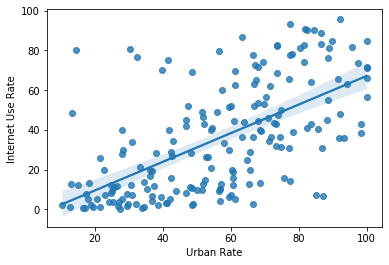

In [18]:
scat1 = sns.regplot(x='urbanrate', y='internetuserate', data=gapminder_data, fit_reg=True)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate');

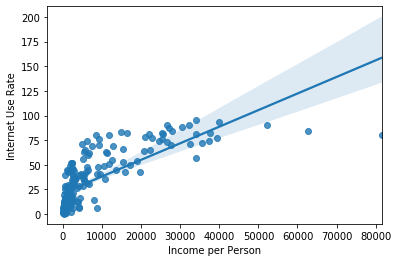

In [19]:
scat2 = sns.regplot(x='incomeperperson', y='internetuserate', fit_reg=True, data=gapminder_data)
plt.xlabel('Income per Person')
plt.ylabel('Internet Use Rate');


In [24]:
data = gapminder_data.dropna().copy()
print('Association between urbanrate and internet use rate')
r, p_value =  scipy.stats.pearsonr(data['urbanrate'], data['internetuserate'])
print(f'r = {r}, p_value = {p_value}')

Association between urbanrate and internet use rate
r = 0.6244640029489794, p_value = 4.540316299446745e-21


In [25]:
print('Association between incomeperperson and internet use rate')
r, p_value =  scipy.stats.pearsonr(data['incomeperperson'], data['internetuserate'])
print(f'r = {r}, p_value = {p_value}')

Association between incomeperperson and internet use rate
r = 0.7507274333051273, p_value = 3.067338031233027e-34


 For the association between urbanrate and
internetuserate, the correlation coefficient is approximately 0.6,
with a very small p-value. This tells us that the relationship
is statistically significant. For the association between
incomeperperson and internetuserate, the correlation
coefficient is approximately 0.75. And also has a significant p-value. Now we can actually interpret the scatter
plots and the correlation coefficients. The association between internet use
rate and income is fairly strong, and it's also positive as the scatter
plot has already shown us. The association between internet use rate
and urban rate is also positive, but slightly more modest at 0.61. Both are statistically significant. That is, for both associations,
it is highly unlikely that a relationship of this magnitude
would be due to chance alone.

Small r squared is the fraction
of the variability of one variable that can
be predicted by the other. For example, when looking at
the relationship between urban rate and internet use rate, if we square our
correlation coefficient of 0.61, we get 0.37. This could be interpreted
the following way. If we know the urban rate, we can predict 37% of the variability we
will see in the rate of internet use. Of course, that also means that 63% of
the variability is unaccounted for. If we square the correlation
coefficient for income per person and internet use rate, we get a value of 0.56. This suggests if we
know income per person, we can predict 56% of the variability
we'll see in the rate of internet use. This is a little bit more
impressive because we can predict over half the variability. Again, correlation coefficients are
commonly denoted with a lowercase r, and they're squared to determine the amount
of variability that can be predicted. 